# Exercise 2 - Formation of a certain water mass

## Import the required packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gsw
import xarray as xr
from netCDF4 import Dataset

## Load the data

In [2]:
fnnt = xr.open_dataset('https://icdc.cen.uni-hamburg.de/thredds/dodsC/oras4_temp_all')  # read the temperature dataset
fnns = xr.open_dataset('https://icdc.cen.uni-hamburg.de/thredds/dodsC/oras4_salt_all')  # read the salinity dataset
lonidx = 304     # choose a longitude index
latidx = 148     # choose a latitude index
startmonth = 720-82    # choose a startindex for the time, so that we don't load the enitre time series
potential_tempseries = fnnt.thetao[:,:,latidx,lonidx].values.T[:,startmonth:]     # load the potential temperature timeseres (2D, i.e. depth x time (42,82))
practical_saltseries = fnns.so[:,:,latidx,lonidx].values.T[:,startmonth:]     # load the practical salinity timeseres (2D, i.e. depth x time (42,82))
meansst = fnnt.thetao[-12:,0,:,:].mean(axis=0)#.values                            # load the annual mean sea surface temperature (SST), calculated over the last available year
depthlevels = fnnt.depth.values*-1                                                # load the depthlevels and define them negatively 
lon_vector = fnnt.lon.values              # load the longitude vector
lat_vector = fnnt.lat.values              # load the latitude vector
lon = lon_vector[lonidx]                 # retrieve the chosen longitude for the profiles
lat = lat_vector[latidx]                 # retrieve the chosen latitude for the profiles
time = fnnt.time.values[startmonth:]      # load the time vector 
time_array = np.repeat(time[np.newaxis,:],np.shape(depthlevels)[0],axis=0)    # extend the time vector to a time array which matches the shape of e.g. potential_tempseries
depthlevels_array = np.repeat(depthlevels[:,np.newaxis],np.shape(time)[0],axis=1)     # expand the depthlevels vector to match the shape of the practical_salinity array
time_array_small = time_array[:-1,:]    # reduced the time array by one row (i.e. reduce its first dimension by 1)

## 2a) In the Jupyter notebook, plot the annual mean sea surface temperature andindicate where the profiles were taken.

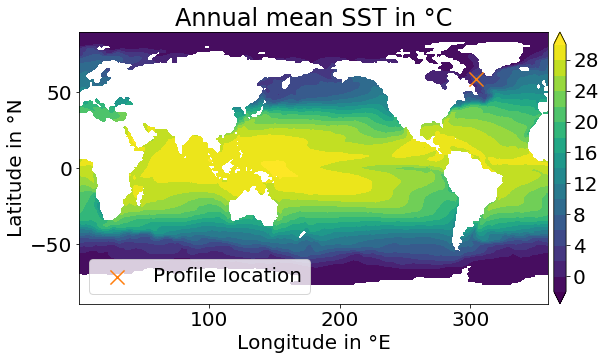

In [3]:
# plot a map of sst (using the variable meansst) and the location of the profiles
### HERE GOES YOUR CODE FOR GENERATING THE PLOT. USING THE VERY FIRST TUTORIAL NOTEBOOK (FROM FEBRUARY 24) MIGHT BE OF HELP
plt.rcParams['font.size']=20                    # set the font size
fig,ax = plt.subplots(figsize=(10,5))           # initialize a figure (fig) and place an axis (ax) into this figure. Also set the overall figure size
c0 = ax.contourf(lon_vector,lat_vector,meansst,levels=np.arange(-2,32,2),extend='both')     # plot the annual mean SST map and choose the color range to show values between -2 and 32°C. Values beyond are shown by saturated color from the tips of the colorbar. 
plt.colorbar(c0,pad=0.01)             # plot the colorbar
ax.set_title('Annual mean SST in °C')     # set the title
ax.set_xlabel('Longitude in °E')    # set the xlabel
ax.set_ylabel('Latitude in °N')    # set the ylabel
ax.scatter(lon,lat,200,'C1',marker='x',label='Profile location')    # plot the location of where the profiles are taken
plt.legend(loc=3)        # create a legend and place it in the lower left corner (loc=3)
plt.show()     # generate the plot

In [5]:
plt.contourf?

## Plotting a timeseries of potential temperature and absolute salinity profiles

Calculate the absolute salinity

In [4]:
pressurelevels_array = gsw.p_from_z(depthlevels_array,lat)                            # calculate the pressure values for the depth levels
absolute_saltseries = gsw.SA_from_SP(practical_saltseries,pressurelevels_array,lon,lat)   # calculate the absolute salinities from the practical salinities

Make the temperature and salinity plots

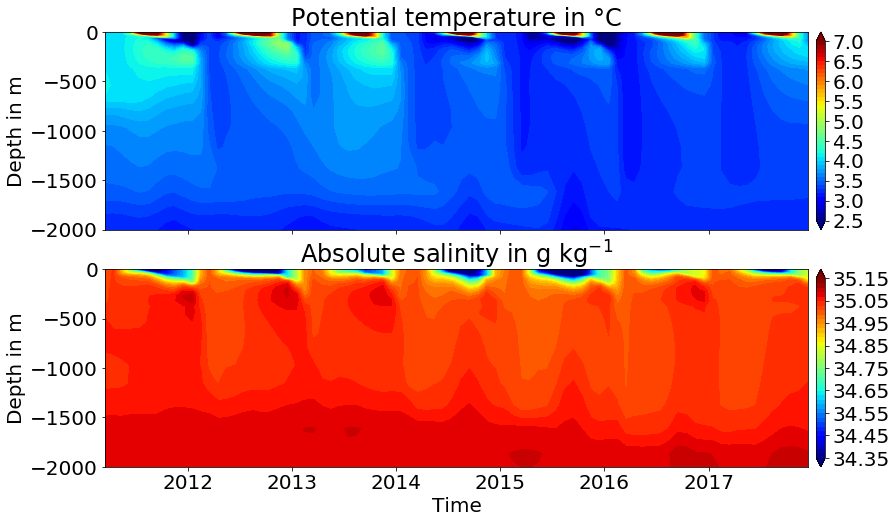

In [5]:
plt.rcParams['font.size']=20 # set the font size
fig, ax = plt.subplots(2,1,figsize=(15,8),sharex=True)      # set up a figure with two axes placed inside (2 rows, 1 column). Make the two axes/subplots share the x-axis
c0 = ax[0].contourf(time_array,depthlevels_array,potential_tempseries,levels=np.linspace(2.5,7,46),extend='both',cmap='jet')       # plot the potential temperature timeseries
c1 = ax[1].contourf(time_array,depthlevels_array,absolute_saltseries,levels=np.linspace(34.35,35.15,41),extend='both',cmap='jet')   # plot the absolute salinity timeseries

titles = ['Potential temperature in °C',r'Absolute salinity in g kg$^{-1}$'] # set up a list with title names 
cs = [c0,c1]  # set up a list with handles of the contourf commands
for idx,axi in enumerate(ax):    # iterate through the subplots (first the upper, then the lower subplot). idx is the number of iterations done (starts with 0), axi is the respective axes.
    axi.set_ylim([-2000,0])      # set the ylimits
    plt.colorbar(cs[idx],ax=axi,pad=0.01) # plot the colorbar
    axi.set_title(titles[idx])   # set the title
    axi.set_ylabel('Depth in m')  # set the ylabel
ax[1].set_xlabel('Time')  # set the xlabel but only for the lower plot. thus kept outside of the for loop.
#plt.savefig('deep_water_formation_T_S.png',dpi=200)
plt.show()   # generate the plot

## 2c) In the Jupyter notebook, calculate and plot the timeseries of the potential density  anomaly  and  the  buoyancy  frequency  profiles  for  the  upper  2000meters.

First calculate the potential density anomaly profile timeseries. Therefore you can use the functions **gsw.CT_from_pt** and **gsw.sigma0**. Remember that you can type and execute e.g. **gsw.sigma0?** to learn more about the function. Keep the suggested variable names to make the script below work.

In [31]:
### HERE GOES YOUR CALCULATION OF THE CONSERVATIVE TEMPERATURE AND POTENTIAL DENSITY TIME SERIES
conservative_tempseries = gsw.CT_from_pt(absolute_saltseries,potential_tempseries)
potential_densityseries = gsw.sigma0(absolute_saltseries,conservative_tempseries)

Now we calculate the squared buoyancy frequency N, i.e. N$^{2}$.

In [32]:
N2series, pressure_at_midpoints = gsw.Nsquared(absolute_saltseries,conservative_tempseries,pressurelevels_array,lat=lat)
z_at_midpoints = gsw.z_from_p(lat=lat,p=pressure_at_midpoints)

Make the plot

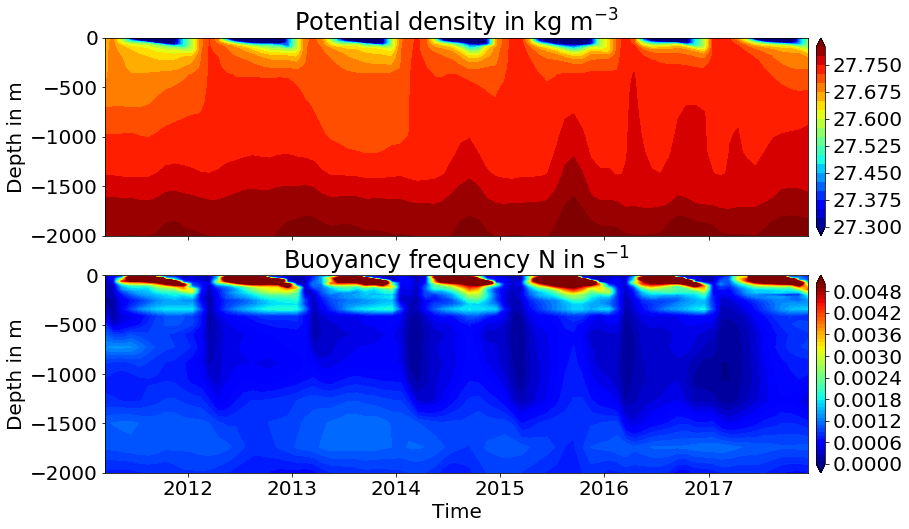

In [33]:
# HERE GOES YOUR PLOT. Start by copy pasting the code to generate the plot for temperature and salinity here and adjust it accordingly. 
# Note that the depth dimension of N2series and z_at_midpoints is reduced by one. 
# To plot the N2 field, replace time_array by time_array_small in the plotting command.

fig, ax = plt.subplots(2,1,figsize=(15,8),sharex=True)
c0 = ax[0].contourf(time_array,depthlevels_array,potential_densityseries,levels=np.linspace(27.3,27.8,21),extend='both',cmap='jet')
c1 = ax[1].contourf(time_array_small,z_at_midpoints,np.sqrt(N2series),levels=np.linspace(0,0.005,51),extend='both',cmap='jet')

titles = [r'Potential density in kg m$^{-3}$',r'Buoyancy frequency N in s$^{-1}$']
cs = [c0,c1]
for idx,axi in enumerate(ax):
    axi.set_ylim([-2000,0])
    plt.colorbar(cs[idx],ax=axi,pad=0.01)
    axi.set_title(titles[idx])
    axi.set_ylabel('Depth in m')
ax[1].set_xlabel('Time')
plt.show()

## 2d) In the Jupyter notebook, plot the mixed layer depth (MLD) on top of the potential density and the buoyancy frequency timeseries (repeat the plot from above and plot MLD onto it). If you haven't succeded to calculate the potential density and buoyancy frequency, then plot the mixed layer depth onto the temperature and salinity timeseries.

We calculate mixed layer depth (MLD) using a very simple density criterion. We define the mixed layer as where the potential density is within 0.1 kg m$^{-3}$ from the surface value. Hence, the mixed layer depth is the deepest location z where $\rho(z) < \rho(z=0m) + 0.05$ kg m$^{-3}$.

In [34]:
surface_pot_densityseries = np.repeat([potential_densityseries[0,:]],np.shape(potential_densityseries)[0],axis=0)
mld_array = potential_densityseries<surface_pot_densityseries+0.05

/Users/ekoehn/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


Make the plot. The code line to include the MLD line in the first subplot (ax[0]) is the following

ax[0].contour(time,depthlevels,mld_array,[0.5],colors='k')

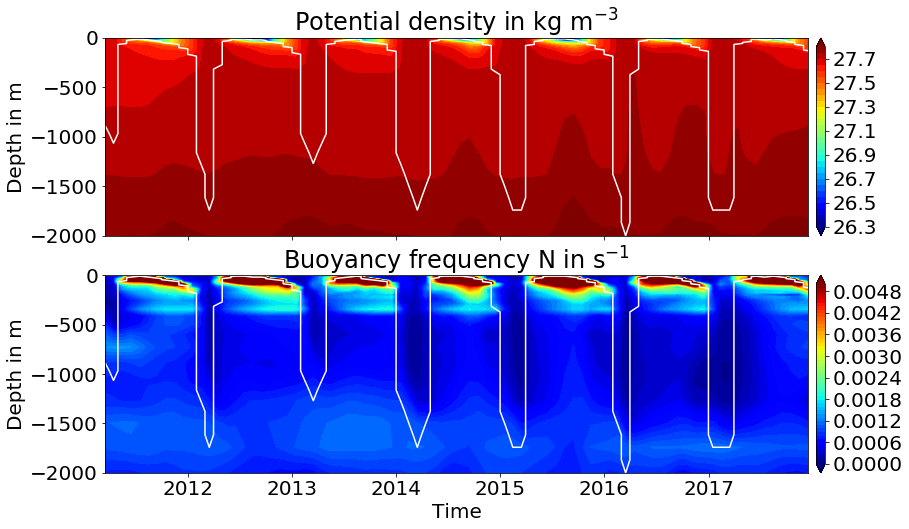

In [36]:
### HERE GOES THE PLOT AGAIN THIS TIME WITH THE MLD
fig, ax = plt.subplots(2,1,figsize=(15,8),sharex=True)
c0 = ax[0].contourf(time,depthlevels,potential_densityseries,levels=np.linspace(26.3,27.8,31),extend='both',cmap='jet')
c1 = ax[1].contourf(time,z_at_midpoints[:,0],np.sqrt(N2series),levels=np.linspace(0,0.005,51),extend='both',cmap='jet')

titles = [r'Potential density in kg m$^{-3}$',r'Buoyancy frequency N in s$^{-1}$']
cs = [c0,c1]
for idx,axi in enumerate(ax):
    axi.set_ylim([-2000,0])
    plt.colorbar(cs[idx],ax=axi,pad=0.01)
    axi.set_title(titles[idx])
    axi.set_ylabel('Depth in m')
    axi.contour(time,depthlevels,mld_array,[0.5],colors='w')
ax[1].set_xlabel('Time')
plt.show()